In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

/Users/alex/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Data Preparation

In [25]:
df = pd.read_csv('stocks_log_unscaled.csv')

# include stock dummy categorical variable for fix-effect regression
df['stock_dummy'] = df['ticker'].astype('category').cat.codes
df = df.rename(columns={'daily_volatility': 'daily_spread'})

df.head()

,Unnamed: 0,date,ticker,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,name_price_attention,daily_spread,log_return,log_attention,stock_dummy
0,0,2014-01-02,MSFT,37.16,30423757.0,-0.006683,37.40,37.10,37.350,37.25,308428000.0,-0.6683,3.15,0.30,-0.006705,1.147402,20
1,1,2014-01-03,MSFT,36.91,30944370.0,-0.006728,37.22,36.60,37.200,36.91,306353000.0,-0.6728,1.54,0.62,-0.006751,0.431782,20
2,2,2014-01-06,MSFT,36.13,43111355.0,-0.021133,36.89,36.11,36.850,36.50,299879000.0,-2.1133,2.24,0.78,-0.021359,0.806476,20
3,3,2014-01-07,MSFT,36.41,35478667.0,0.007750,36.49,36.21,36.325,36.35,302203000.0,0.7750,1.19,0.28,0.007720,0.173953,20
4,4,2014-01-08,MSFT,35.76,59452427.0,-0.017852,36.14,35.58,36.000,35.86,296808000.0,-1.7852,1.68,0.56,-0.018013,0.518794,20


In [43]:
df_scaled = pd.read_csv('stocks_log_norm_scaled.csv')
df_scaled = df_scaled.rename(columns={'volatility': 'daily_spread'})

# add jan mon and annual rep dummies 
df_scaled['jan_dummy'] = anomalies_df['jan_dummy']
df_scaled['annual_rep_release'] = anomalies_df['annual_rep_release']
df_scaled['monday_dummy'] = anomalies_df['monday_dummy']

df_scaled.head()

,Unnamed: 0,date,permno,ticker,price,volume,return,high,low,open,...,pct_return,name_price_attention,daily_spread,industry,stock_dummy,log_return,log_name_price_attention,jan_dummy,annual_rep_release,monday_dummy
0,0,2014-01-02,10107,MSFT,-0.999221,1.117934,-0.006683,-0.992613,-1.004799,-0.997672,...,-0.419196,-0.712226,-0.494860,Technology,20,-0.006705,1.423108,1,0,0
1,1,2014-01-03,10107,MSFT,-1.001527,1.148820,-0.006728,-0.994243,-1.009502,-0.999057,...,-0.421781,-0.816796,-0.438358,Technology,20,-0.006751,0.932164,1,0,0
2,2,2014-01-06,10107,MSFT,-1.008721,1.870624,-0.021133,-0.997232,-1.014112,-1.002286,...,-1.249333,-0.771331,-0.410107,Technology,20,-0.021359,1.175573,1,0,1
3,3,2014-01-07,10107,MSFT,-1.006139,1.417816,0.007750,-1.000854,-1.013171,-1.007130,...,0.409965,-0.839528,-0.498392,Technology,20,0.007720,0.783902,1,0,0
4,4,2014-01-08,10107,MSFT,-1.012134,2.840056,-0.017852,-1.004023,-1.019098,-1.010129,...,-1.060843,-0.807703,-0.448952,Technology,20,-0.018013,0.985817,1,0,0


In [30]:
anomalies_df = pd.read_csv('anomalies_dummies.csv')

# rename volatility as daily_volatility
anomalies_df = anomalies_df.rename(columns={'volatility': 'daily_spread'})
anomalies_df['stock_dummy'] = anomalies_df['ticker'].astype('category').cat.codes
anomalies_df['log_return'] = df['log_return']
anomalies_df['log_name_price_attention'] = df['log_attention']
anomalies_df.head()

,Unnamed: 0,date,permno,ticker,price,volume,return,high,low,open,...,total_assets,earnings_per_share,book_to_market,dt_date,jan_dummy,monday_dummy,annual_rep_release,stock_dummy,log_return,log_name_price_attention
0,0,2014-01-02,10107,MSFT,-0.999221,1.117934,-0.006683,-0.992613,-1.004799,-0.997672,...,NaN,NaN,NaN,2014-01-02,1,0,0,20,-0.006705,1.147402
1,1,2014-01-03,10107,MSFT,-1.001527,1.148820,-0.006728,-0.994243,-1.009502,-0.999057,...,NaN,NaN,NaN,2014-01-03,1,0,0,20,-0.006751,0.431782
2,2,2014-01-06,10107,MSFT,-1.008721,1.870624,-0.021133,-0.997232,-1.014112,-1.002286,...,NaN,NaN,NaN,2014-01-06,1,1,0,20,-0.021359,0.806476
3,3,2014-01-07,10107,MSFT,-1.006139,1.417816,0.007750,-1.000854,-1.013171,-1.007130,...,NaN,NaN,NaN,2014-01-07,1,0,0,20,0.007720,0.173953
4,4,2014-01-08,10107,MSFT,-1.012134,2.840056,-0.017852,-1.004023,-1.019098,-1.010129,...,NaN,NaN,NaN,2014-01-08,1,0,0,20,-0.018013,0.518794


In [8]:
df.describe()

/Users/alex/anaconda3/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/alex/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,Unnamed: 0,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,name_price_attention,daily_volatility,log_return,log_attention
count,70448.000000,70448.000000,7.044800e+04,70448.000000,70448.000000,70448.000000,70448.000000,70448.000000,7.044800e+04,70448.000000,70448.000000,70448.000000,70448.000000,7.044800e+04
mean,35223.500000,145.495397,1.157947e+07,0.000614,147.012658,143.910029,145.475873,145.461344,2.577778e+08,0.061384,14.115716,3.102629,0.000462,-inf
std,20336.730219,108.420623,1.685646e+07,0.017407,110.429143,106.300702,108.378896,108.347582,3.664491e+08,1.740688,15.396513,5.663514,0.017416,NaN
min,0.000000,21.349900,3.053580e+05,-0.238484,21.620000,21.270000,21.340000,21.445000,1.715150e+07,-23.848400,0.000000,0.090000,-0.272444,-inf
25%,17611.750000,80.590000,3.327002e+06,-0.006783,81.240000,80.000000,80.580000,80.613750,1.069959e+08,-0.678300,0.000000,1.040000,-0.006806,NaN
50%,35223.500000,125.940000,6.196272e+06,0.000619,127.090000,124.750000,125.900000,125.850000,1.683775e+08,0.061900,9.680000,1.870010,0.000619,2.270062e+00
75%,52835.250000,176.352508,1.294353e+07,0.008153,177.950000,174.610000,176.292492,176.281250,2.482573e+08,0.815300,21.840000,3.450000,0.008120,3.083743e+00
max,70447.000000,2238.750000,6.182376e+08,0.260449,2318.489990,2186.520020,2295.120120,2252.505005,3.081156e+09,26.044900,100.000000,323.879880,0.231468,4.605170e+00


In [9]:
df_scaled.describe()

,Unnamed: 0,permno,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,name_price_attention,volatility,stock_dummy,log_return,log_name_price_attention
count,70448.000000,70448.000000,7.044800e+04,7.044800e+04,70448.000000,7.044800e+04,7.044800e+04,7.044800e+04,70448.000000,7.044800e+04,7.044800e+04,7.044800e+04,7.044800e+04,70448.000000,70448.000000,70448.000000
mean,35223.500000,42556.107143,-2.969336e-16,1.936523e-17,0.000614,9.037110e-17,-1.291016e-16,-1.032813e-16,0.000000,-2.582031e-17,-2.138245e-17,-2.582031e-17,3.873047e-17,13.500000,0.000462,2.000092
std,20336.730219,28269.163826,1.000007e+00,1.000007e+00,0.017407,1.000007e+00,1.000007e+00,1.000007e+00,1.000007,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,8.077805,0.017416,1.379421
min,0.000000,10107.000000,-1.145044e+00,-6.688350e-01,-0.238484,-1.135511e+00,-1.153717e+00,-1.145396e+00,-1.144624,-6.566479e-01,-1.373592e+01,-9.168190e-01,-5.319401e-01,0.000000,-0.272444,0.000000
25%,17611.750000,17270.500000,-5.986486e-01,-4.895764e-01,-0.006783,-5.956138e-01,-6.012235e-01,-5.987912e-01,-0.598519,-4.114707e-01,-4.249406e-01,-9.168190e-01,-3.641986e-01,6.750000,-0.006806,0.000000
50%,35223.500000,34926.000000,-1.803673e-01,-3.193574e-01,0.000619,-1.804125e-01,-1.802450e-01,-1.806257e-01,-0.181005,-2.439655e-01,2.964425e-04,-2.881008e-01,-2.176436e-01,13.500000,0.000619,2.368373
75%,52835.250000,61063.000000,2.846076e-01,8.092260e-02,0.008153,2.801576e-01,2.888051e-01,2.843435e-01,0.284456,-2.598057e-02,4.331168e-01,5.016940e-01,6.133531e-02,20.250000,0.008120,3.128513
max,70447.000000,93436.000000,1.930693e+01,3.598990e+01,0.260449,1.966413e+01,1.921553e+01,1.983467e+01,19.447214,7.704748e+00,1.492726e+01,5.578204e+00,5.663966e+01,27.000000,0.231468,4.615121


### OLS Linear Regression 

Univariate Linear Regression is a simple linear regression model with a single explanatory variable. It is a straight line fit to the data. The model is defined as:

In [106]:
from statsmodels.formula.api import ols

model_1 = ols('Q("pct_return") ~  name_price_attention + C(stock_dummy)', data=df).fit() 

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q("pct_return")   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.814
Date:                Thu, 07 Mar 2024   Prob (F-statistic):            0.00529
Time:                        18:02:55   Log-Likelihood:            -1.3898e+05
No. Observations:               70448   AIC:                         2.780e+05
Df Residuals:                   70419   BIC:                         2.783e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0589      0.036      1.620      0.105      -0.012       0.130
C(stock_dummy)[T.1]     -0.0367      0.049     -0.747      0.455      -0.133       0.060
C(stock_dummy)[T.2]     -0.0246      0.050     -0.497      0.619      -0.122       0.073
C(stock_dummy)[T.3]     -0.0189      0.049     -0.381      0.703      -0.116       0.078
C(stock_dummy)[T.4]     -0.0292      0.049     -0.594      0.553      -0.125       0.067
C(stock_dummy)[T.5]      0.0049      0.049      0.099      0.921      -0.092       0.102
C(stock_dummy)[T.6]     -0.0466      0.049     -0.949      0.343      -0.143       0.050
C(stock_dummy)[T.7]     -0.0587      0.049     -1.194      0.232      -0.155       0.038
C(stock_dummy)[T.8]     -0.0580      0.049     -1.174      0.240      -0.155       0.039
C(stock_dummy)[T.9]     -0.0238      0.050     -0.480      0.631      -0.121       0.073
C(stock_dummy)[T.10]    -0.0357      0.049     -0.727      0.467      -0.132       0.060
C(stock_dummy)[T.11]    -0.0352      0.049     -0.714      0.475      -0.132       0.061
C(stock_dummy)[T.12]    -0.1175      0.049     -2.374      0.018      -0.214      -0.020
C(stock_dummy)[T.13]    -0.0626      0.049     -1.274      0.203      -0.159       0.034
C(stock_dummy)[T.14]    -0.0377      0.050     -0.760      0.447      -0.135       0.060
C(stock_dummy)[T.15]    -0.0167      0.049     -0.339      0.735      -0.114       0.080
C(stock_dummy)[T.16]    -0.0399      0.050     -0.802      0.422      -0.137       0.058
C(stock_dummy)[T.17]    -0.0238      0.049     -0.482      0.630      -0.120       0.073
C(stock_dummy)[T.18]    -0.0694      0.049     -1.405      0.160      -0.166       0.027
C(stock_dummy)[T.19]    -0.0309      0.049     -0.625      0.532      -0.128       0.066
C(stock_dummy)[T.20]     0.0118      0.049      0.240      0.811      -0.084       0.108
C(stock_dummy)[T.21]    -0.0038      0.050     -0.077      0.939      -0.102       0.094
C(stock_dummy)[T.22]    -0.0430      0.049     -0.871      0.384      -0.140       0.054
C(stock_dummy)[T.23]    -0.0235      0.050     -0.474      0.636      -0.121       0.074
C(stock_dummy)[T.24]     0.0803      0.049      1.636      0.102      -0.016       0.176
C(stock_dummy)[T.25]     0.0363      0.050      0.723      0.470      -0.062       0.135
C(stock_dummy)[T.26]    -0.1055      0.049     -2.149      0.032      -0.202      -0.009
C(stock_dummy)[T.27]    -0.0554      0.049     -1.129      0.259      -0.152       0.041
name_price_attention     0.0024      0.000      4.777      0.000       0.001       0.003
==============================================================================
Omnibus:                    15704.034   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           767936.50

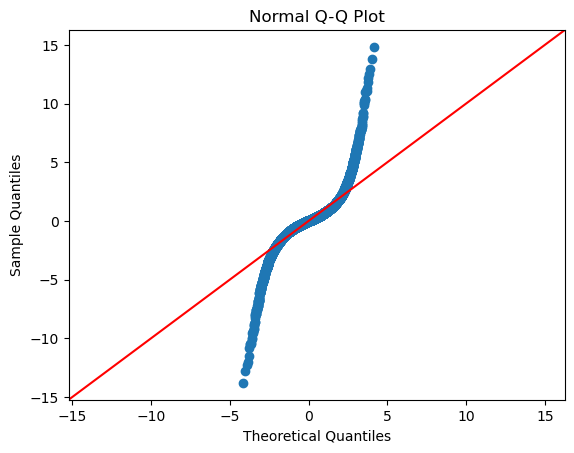

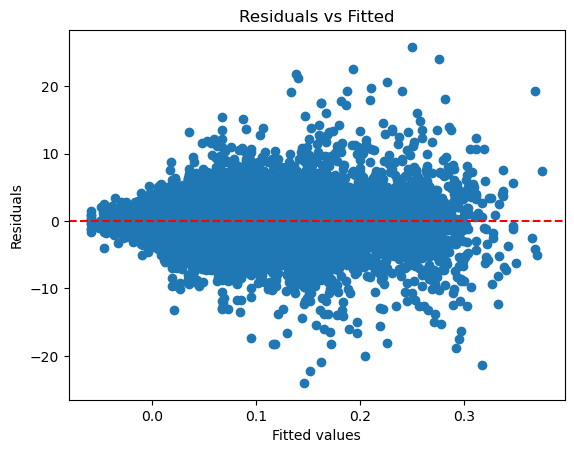

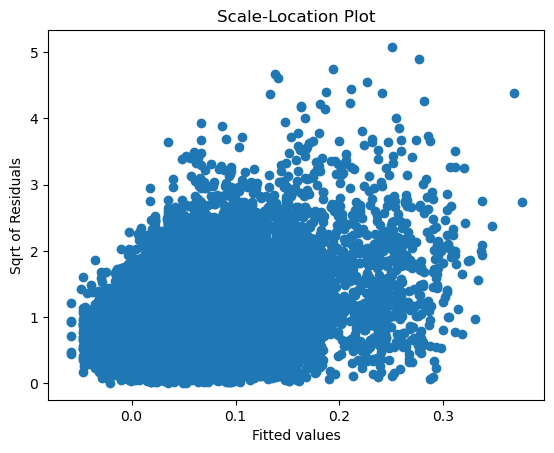

In [107]:
# QQ plot for normality of residuals
fig = sm.qqplot(model_1.resid, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.show()

# Residuals vs Fitted for homoscedasticity
plt.scatter(model_1.fittedvalues, model_1.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Scale-Location plot (also called Spread-Location plot)
plt.scatter(model_1.fittedvalues, model_1.resid**0.5)
plt.xlabel('Fitted values')
plt.ylabel('Sqrt of Residuals')
plt.title('Scale-Location Plot')
plt.show()

# Leverage plot to find influential cases
#sm.graphics.influence_plot(model_1, criterion="cooks")
#plt.title('Influence Plot')
#plt.show()

The presence of heteroscedasticity is problematic because it means that the regression model is giving unequal weight to the observations: the model is less precise for predicting larger or smaller values.


In the following model we include all control variables to see wether the performance of the model improves. 

In [77]:
model_2 = ols('Q("return") ~  name_price_attention + C(stock_dummy) + volume + daily_spread + mkt_cap + jan_dummy + monday_dummy + annual_rep_release', data=anomalies_df).fit() 

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q("return")   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.935
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           2.23e-08
Time:                        17:50:06   Log-Likelihood:             1.8547e+05
No. Observations:               70448   AIC:                        -3.709e+05
Df Residuals:                   70413   BIC:                        -3.705e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0016      0.001      3.118      0.002       0.001       0.003
C(stock_dummy)[T.1]     -0.0012      0.001     -1.890      0.059      -0.002    4.55e-05
C(stock_dummy)[T.2]     -0.0010      0.001     -1.577      0.115      -0.002       0.000
C(stock_dummy)[T.3]     -0.0008      0.001     -1.208      0.227      -0.002       0.000
C(stock_dummy)[T.4]     -0.0011      0.001     -1.711      0.087      -0.002       0.000
C(stock_dummy)[T.5]     -0.0006      0.001     -1.017      0.309      -0.002       0.001
C(stock_dummy)[T.6]     -0.0007      0.001     -1.201      0.230      -0.002       0.000
C(stock_dummy)[T.7]     -0.0014      0.001     -2.214      0.027      -0.003      -0.000
C(stock_dummy)[T.8]     -0.0012      0.001     -1.989      0.047      -0.002   -1.78e-05
C(stock_dummy)[T.9]     -0.0010      0.001     -1.495      0.135      -0.002       0.000
C(stock_dummy)[T.10]    -0.0013      0.001     -2.048      0.041      -0.003   -5.62e-05
C(stock_dummy)[T.11]    -0.0012      0.001     -1.874      0.061      -0.002    5.55e-05
C(stock_dummy)[T.12]    -0.0022      0.001     -3.307      0.001      -0.004      -0.001
C(stock_dummy)[T.13]    -0.0007      0.001     -1.169      0.243      -0.002       0.000
C(stock_dummy)[T.14]    -0.0012      0.001     -2.018      0.044      -0.002   -3.48e-05
C(stock_dummy)[T.15]    -0.0008      0.001     -1.282      0.200      -0.002       0.000
C(stock_dummy)[T.16]    -0.0009      0.001     -1.488      0.137      -0.002       0.000
C(stock_dummy)[T.17]    -0.0011      0.001     -1.674      0.094      -0.002       0.000
C(stock_dummy)[T.18]    -0.0015      0.001     -2.360      0.018      -0.003      -0.000
C(stock_dummy)[T.19]    -0.0010      0.001     -1.575      0.115      -0.002       0.000
C(stock_dummy)[T.20]    -0.0005      0.001     -1.012      0.312      -0.002       0.000
C(stock_dummy)[T.21]    -0.0007      0.001     -1.059      0.290      -0.002       0.001
C(stock_dummy)[T.22]    -0.0012      0.001     -2.000      0.046      -0.002   -2.43e-05
C(stock_dummy)[T.23]    -0.0010      0.001     -1.585      0.113      -0.002       0.000
C(stock_dummy)[T.24]     0.0011      0.001      1.704      0.088      -0.000       0.002
C(stock_dummy)[T.25]    -0.0004      0.001     -0.612      0.541      -0.002       0.001
C(stock_dummy)[T.26]    -0.0016      0.001     -2.606      0.009      -0.003      -0.000
C(stock_dummy)[T.27]    -0.0014      0.001     -2.350      0.019      -0.003      -0.000
name_price_attention     0.0005   8.53e-05      5.991      0.000       0.000       0.001
volume                  -0.0006   9.62e-05     -6.404      0.000      -0.001      -0.000
daily_spread            -0.0002   8.26e-05     -1.883      0.060      -0.000    6.35e-06
mkt_cap                  0.0003      0.000      2.262    

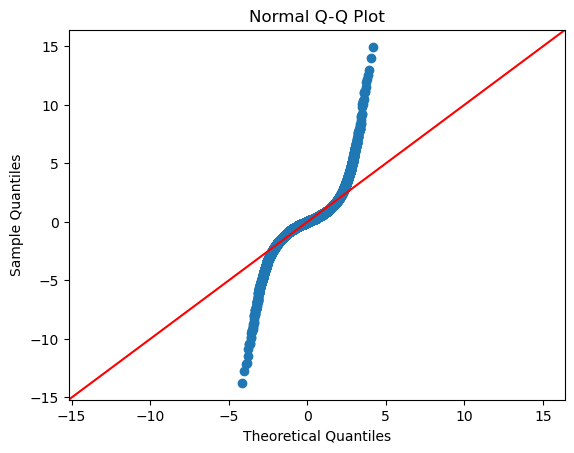

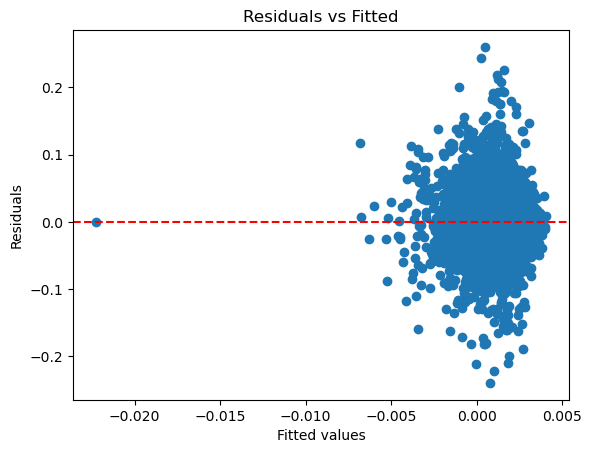

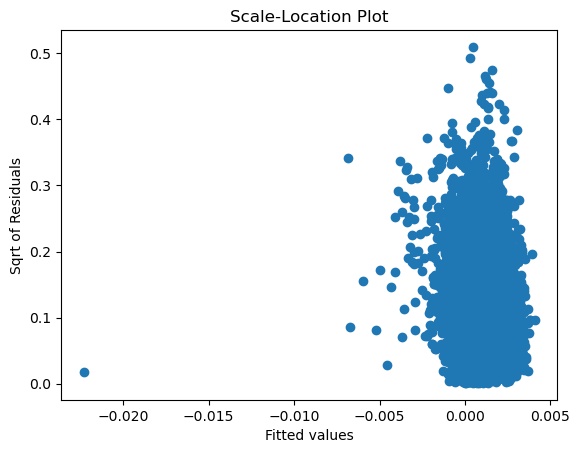

In [78]:
# QQ plot for normality of residuals
fig = sm.qqplot(model_2.resid, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.show()

# Residuals vs Fitted for homoscedasticity
plt.scatter(model_2.fittedvalues, model_2.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Scale-Location plot (also called Spread-Location plot)
plt.scatter(model_2.fittedvalues, model_2.resid**0.5)
plt.xlabel('Fitted values')
plt.ylabel('Sqrt of Residuals')
plt.title('Scale-Location Plot')
plt.show()

# Leverage plot to find influential cases
#sm.graphics.influence_plot(model_1, criterion="cooks")
#plt.title('Influence Plot')
#plt.show()

The low R-squared values in combination with the high AIC and BIC values suggest that the models have very low to no predictive power.

**Test statistics**

Omnibus Test: The Omnibus test is a statistical test to check the skewness and kurtosis of the residuals. A significant result (Prob(Omnibus) close to 0, as in this case) indicates that the residuals are not normally distributed. In your results, the Omnibus statistic is very high, and the probability is 0.000, which suggests a departure from the normality assumption.


Skew: This measures the asymmetry of the residuals distribution. A skew close to 0, which is the case here (0.092), suggests that the residuals are fairly symmetrical.


Kurtosis: This measures the 'tailedness' of the residuals distribution. A kurtosis value significantly larger than 3 indicates a distribution with heavier tails than a normal distribution. Here, the kurtosis is 19.174, which is quite high, indicating heavy tails.


Durbin-Watson: This statistic tests for the presence of autocorrelation in the residuals. A value close to 2 suggests there is no first-order linear autocorrelation. With your Durbin-Watson value of 2.103, it appears that autocorrelation is not a concern.


Jarque-Bera (JB) Test: This is another test for normality in the residuals. Like the Omnibus test, if the probability of JB is low (as it is here, Prob(JB) = 0.00), it indicates that the residuals do not follow a normal distribution. The JB statistic is extremely high, reinforcing the result of the Omnibus test.
Condition Number: A high condition number (over 20-30) can indicate multicollinearity. In your results, the condition number is 600, which suggests potential multicollinearity issues in the model.

Given these results we will now perform various test to check why the current model is not performing well. 

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = anomalies_df[['name_price_attention', 'stock_dummy' ,  'mkt_cap' , 'volume' , 'jan_dummy' , 'monday_dummy',  'annual_rep_release']]

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

# Create a column in the dataframe that will contain the names of all the feature variables
vif["Features"] = X.columns

# Create a column in the dataframe that will contain the VIF values of the feature variables
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the dataframe
print(vif)


               Features       VIF
0  name_price_attention  1.143785
1           stock_dummy  1.229486
2               mkt_cap  1.449453
3                volume  1.530853
4             jan_dummy  1.064675
5          monday_dummy  1.159603
6    annual_rep_release  1.008621


In [120]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model_4.resid, model_4.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': 11926.462093267282, 'p-value': 0.0, 'f-value': 422.0557610127005, 'f p-value': 0.0}


In [121]:
from scipy import stats

shapiro_test = stats.shapiro(model_4.resid)
print(f"Shapiro-Wilk test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}")

Shapiro-Wilk test statistic: 0.8692505387547662, p-value: 9.266306422316844e-112


/var/folders/hp/hkpqf03x0qdg7_8s3s9sy7gw0000gn/T/ipykernel_27191/134018568.py:3: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 70448.
  shapiro_test = stats.shapiro(model_4.resid)


Given these test results we start by scaling the data.

**Scaling the data**

In [79]:
model_3 = ols('Q("return") ~  name_price_attention + C(stock_dummy) + volume + daily_spread + mkt_cap + jan_dummy + monday_dummy + annual_rep_release', data=df_scaled).fit() 

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q("return")   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.935
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           2.23e-08
Time:                        17:50:07   Log-Likelihood:             1.8547e+05
No. Observations:               70448   AIC:                        -3.709e+05
Df Residuals:                   70413   BIC:                        -3.705e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0016      0.001      3.118      0.002       0.001       0.003
C(stock_dummy)[T.1]     -0.0012      0.001     -1.890      0.059      -0.002    4.55e-05
C(stock_dummy)[T.2]     -0.0010      0.001     -1.577      0.115      -0.002       0.000
C(stock_dummy)[T.3]     -0.0008      0.001     -1.208      0.227      -0.002       0.000
C(stock_dummy)[T.4]     -0.0011      0.001     -1.711      0.087      -0.002       0.000
C(stock_dummy)[T.5]     -0.0006      0.001     -1.017      0.309      -0.002       0.001
C(stock_dummy)[T.6]     -0.0007      0.001     -1.201      0.230      -0.002       0.000
C(stock_dummy)[T.7]     -0.0014      0.001     -2.214      0.027      -0.003      -0.000
C(stock_dummy)[T.8]     -0.0012      0.001     -1.989      0.047      -0.002   -1.78e-05
C(stock_dummy)[T.9]     -0.0010      0.001     -1.495      0.135      -0.002       0.000
C(stock_dummy)[T.10]    -0.0013      0.001     -2.048      0.041      -0.003   -5.62e-05
C(stock_dummy)[T.11]    -0.0012      0.001     -1.874      0.061      -0.002    5.55e-05
C(stock_dummy)[T.12]    -0.0022      0.001     -3.307      0.001      -0.004      -0.001
C(stock_dummy)[T.13]    -0.0007      0.001     -1.169      0.243      -0.002       0.000
C(stock_dummy)[T.14]    -0.0012      0.001     -2.018      0.044      -0.002   -3.48e-05
C(stock_dummy)[T.15]    -0.0008      0.001     -1.282      0.200      -0.002       0.000
C(stock_dummy)[T.16]    -0.0009      0.001     -1.488      0.137      -0.002       0.000
C(stock_dummy)[T.17]    -0.0011      0.001     -1.674      0.094      -0.002       0.000
C(stock_dummy)[T.18]    -0.0015      0.001     -2.360      0.018      -0.003      -0.000
C(stock_dummy)[T.19]    -0.0010      0.001     -1.575      0.115      -0.002       0.000
C(stock_dummy)[T.20]    -0.0005      0.001     -1.012      0.312      -0.002       0.000
C(stock_dummy)[T.21]    -0.0007      0.001     -1.059      0.290      -0.002       0.001
C(stock_dummy)[T.22]    -0.0012      0.001     -2.000      0.046      -0.002   -2.43e-05
C(stock_dummy)[T.23]    -0.0010      0.001     -1.585      0.113      -0.002       0.000
C(stock_dummy)[T.24]     0.0011      0.001      1.704      0.088      -0.000       0.002
C(stock_dummy)[T.25]    -0.0004      0.001     -0.612      0.541      -0.002       0.001
C(stock_dummy)[T.26]    -0.0016      0.001     -2.606      0.009      -0.003      -0.000
C(stock_dummy)[T.27]    -0.0014      0.001     -2.350      0.019      -0.003      -0.000
name_price_attention     0.0005   8.53e-05      5.991      0.000       0.000       0.001
volume                  -0.0006   9.62e-05     -6.404      0.000      -0.001      -0.000
daily_spread            -0.0002   8.26e-05     -1.883      0.060      -0.000    6.35e-06
mkt_cap                  0.0003      0.000      2.262    

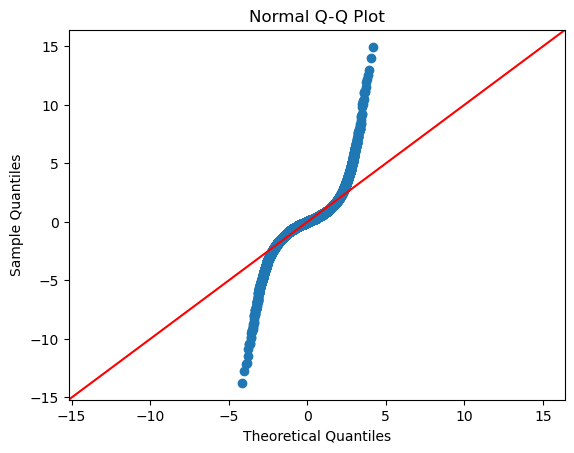

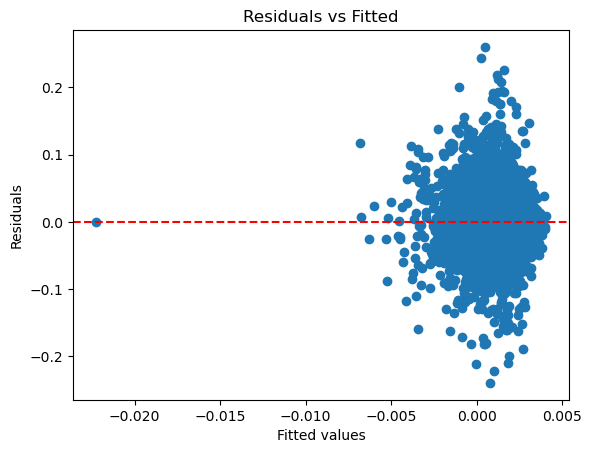

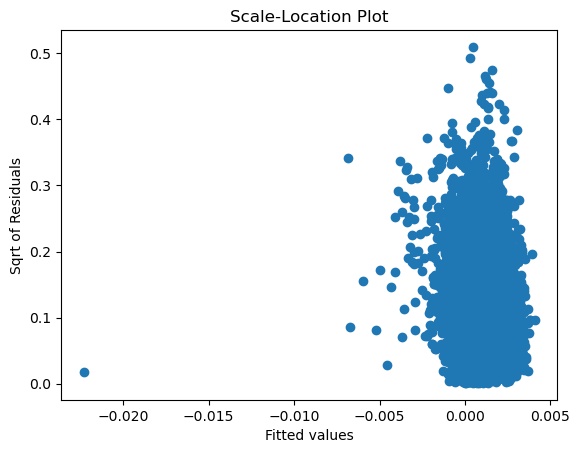

In [80]:
# QQ plot for normality of residuals
fig = sm.qqplot(model_3.resid, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.show()

# Residuals vs Fitted for homoscedasticity
plt.scatter(model_3.fittedvalues, model_3.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Scale-Location plot (also called Spread-Location plot)
plt.scatter(model_3.fittedvalues, model_3.resid**0.5)
plt.xlabel('Fitted values')
plt.ylabel('Sqrt of Residuals')
plt.title('Scale-Location Plot')
plt.show()

# Leverage plot to find influential cases
#sm.graphics.influence_plot(model_1, criterion="cooks")
#plt.title('Influence Plot')
#plt.show()

Given these test results it is clear that we need to further transform our data to make it more suitable for linear regression. We start by performing a log transformation on the target variable.

**Log Transformation of the target variable**

In [81]:
model_4 = ols('Q("log_return") ~  name_price_attention + C(stock_dummy) + volume + daily_spread + mkt_cap + jan_dummy + monday_dummy + annual_rep_release', data=df_scaled).fit() 

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q("log_return")   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.369
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           1.21e-10
Time:                        17:50:08   Log-Likelihood:             1.8544e+05
No. Observations:               70448   AIC:                        -3.708e+05
Df Residuals:                   70413   BIC:                        -3.705e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0015      0.001      2.889      0.004       0.000       0.002
C(stock_dummy)[T.1]     -0.0012      0.001     -1.878      0.060      -0.002    5.32e-05
C(stock_dummy)[T.2]     -0.0012      0.001     -1.803      0.071      -0.002       0.000
C(stock_dummy)[T.3]     -0.0009      0.001     -1.402      0.161      -0.002       0.000
C(stock_dummy)[T.4]     -0.0011      0.001     -1.741      0.082      -0.002       0.000
C(stock_dummy)[T.5]     -0.0008      0.001     -1.231      0.218      -0.002       0.000
C(stock_dummy)[T.6]     -0.0006      0.001     -1.059      0.290      -0.002       0.001
C(stock_dummy)[T.7]     -0.0015      0.001     -2.350      0.019      -0.003      -0.000
C(stock_dummy)[T.8]     -0.0013      0.001     -2.117      0.034      -0.003    -9.7e-05
C(stock_dummy)[T.9]     -0.0010      0.001     -1.539      0.124      -0.002       0.000
C(stock_dummy)[T.10]    -0.0013      0.001     -2.006      0.045      -0.003   -2.92e-05
C(stock_dummy)[T.11]    -0.0012      0.001     -1.940      0.052      -0.003    1.27e-05
C(stock_dummy)[T.12]    -0.0021      0.001     -3.176      0.001      -0.003      -0.001
C(stock_dummy)[T.13]    -0.0006      0.001     -0.973      0.330      -0.002       0.001
C(stock_dummy)[T.14]    -0.0013      0.001     -2.202      0.028      -0.002      -0.000
C(stock_dummy)[T.15]    -0.0008      0.001     -1.431      0.152      -0.002       0.000
C(stock_dummy)[T.16]    -0.0009      0.001     -1.554      0.120      -0.002       0.000
C(stock_dummy)[T.17]    -0.0011      0.001     -1.710      0.087      -0.002       0.000
C(stock_dummy)[T.18]    -0.0016      0.001     -2.442      0.015      -0.003      -0.000
C(stock_dummy)[T.19]    -0.0010      0.001     -1.647      0.100      -0.002       0.000
C(stock_dummy)[T.20]    -0.0007      0.001     -1.337      0.181      -0.002       0.000
C(stock_dummy)[T.21]    -0.0008      0.001     -1.296      0.195      -0.002       0.000
C(stock_dummy)[T.22]    -0.0013      0.001     -2.104      0.035      -0.002   -8.78e-05
C(stock_dummy)[T.23]    -0.0011      0.001     -1.717      0.086      -0.002       0.000
C(stock_dummy)[T.24]     0.0013      0.001      2.083      0.037    7.95e-05       0.003
C(stock_dummy)[T.25]    -0.0005      0.001     -0.761      0.447      -0.002       0.001
C(stock_dummy)[T.26]    -0.0015      0.001     -2.410      0.016      -0.003      -0.000
C(stock_dummy)[T.27]    -0.0015      0.001     -2.438      0.015      -0.003      -0.000
name_price_attention     0.0004   8.53e-05      4.867      0.000       0.000       0.001
volume                  -0.0008   9.63e-05     -8.163      0.000      -0.001      -0.001
daily_spread            -0.0004   8.26e-05     -4.368      0.000      -0.001      -0.000
mkt_cap                  0.0004      0.000      3.510    

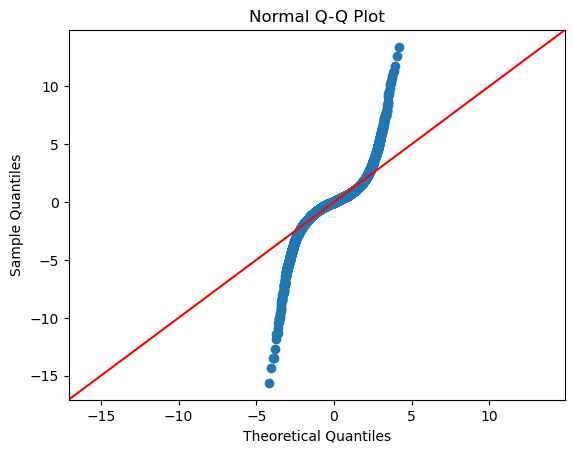

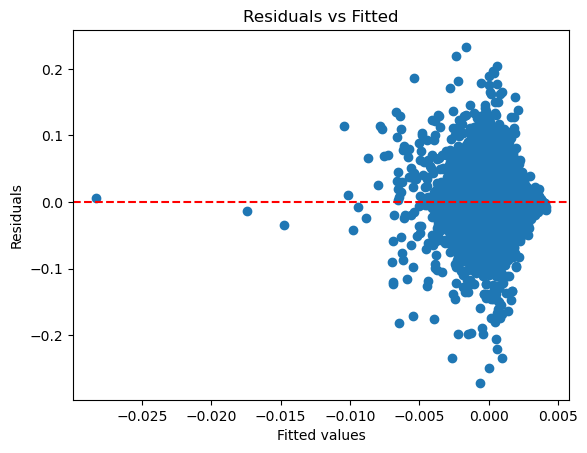

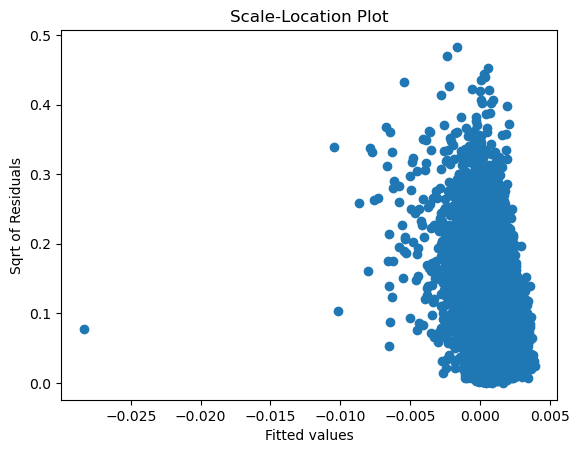

In [82]:
# QQ plot for normality of residuals
fig = sm.qqplot(model_4.resid, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.show()

# Residuals vs Fitted for homoscedasticity
plt.scatter(model_4.fittedvalues, model_4.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Scale-Location plot (also called Spread-Location plot)
plt.scatter(model_4.fittedvalues, model_4.resid**0.5)
plt.xlabel('Fitted values')
plt.ylabel('Sqrt of Residuals')
plt.title('Scale-Location Plot')
plt.show()

# Leverage plot to find influential cases
#sm.graphics.influence_plot(model_1, criterion="cooks")
#plt.title('Influence Plot')
#plt.show()

In [83]:
model_5 = ols('Q("return") ~  log_name_price_attention + C(stock_dummy) + volume + daily_spread + mkt_cap + jan_dummy + monday_dummy + annual_rep_release', data=df_scaled).fit() 

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q("return")   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.550
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           1.74e-06
Time:                        17:50:08   Log-Likelihood:             1.8546e+05
No. Observations:               70448   AIC:                        -3.708e+05
Df Residuals:                   70413   BIC:                        -3.705e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.0006      0.001      1.130      0.259      -0.000       0.002
C(stock_dummy)[T.1]         -0.0007      0.001     -1.042      0.297      -0.002       0.001
C(stock_dummy)[T.2]         -0.0005      0.001     -0.800      0.423      -0.002       0.001
C(stock_dummy)[T.3]         -0.0005      0.001     -0.735      0.462      -0.002       0.001
C(stock_dummy)[T.4]         -0.0006      0.001     -0.925      0.355      -0.002       0.001
C(stock_dummy)[T.5]         -0.0002      0.001     -0.304      0.761      -0.001       0.001
C(stock_dummy)[T.6]         -0.0004      0.001     -0.583      0.560      -0.002       0.001
C(stock_dummy)[T.7]         -0.0010      0.001     -1.631      0.103      -0.002       0.000
C(stock_dummy)[T.8]         -0.0010      0.001     -1.583      0.113      -0.002       0.000
C(stock_dummy)[T.9]         -0.0005      0.001     -0.758      0.448      -0.002       0.001
C(stock_dummy)[T.10]        -0.0008      0.001     -1.307      0.191      -0.002       0.000
C(stock_dummy)[T.11]        -0.0007      0.001     -1.151      0.250      -0.002       0.001
C(stock_dummy)[T.12]        -0.0015      0.001     -2.282      0.022      -0.003      -0.000
C(stock_dummy)[T.13]        -0.0002      0.001     -0.374      0.709      -0.001       0.001
C(stock_dummy)[T.14]        -0.0007      0.001     -1.248      0.212      -0.002       0.000
C(stock_dummy)[T.15]        -0.0003      0.001     -0.532      0.595      -0.001       0.001
C(stock_dummy)[T.16]        -0.0004      0.001     -0.712      0.477      -0.002       0.001
C(stock_dummy)[T.17]        -0.0007      0.001     -1.035      0.301      -0.002       0.001
C(stock_dummy)[T.18]        -0.0012      0.001     -1.820      0.069      -0.002    8.94e-05
C(stock_dummy)[T.19]        -0.0007      0.001     -1.062      0.288      -0.002       0.001
C(stock_dummy)[T.20]        -0.0004      0.001     -0.751      0.453      -0.001       0.001
C(stock_dummy)[T.21]        -0.0003      0.001     -0.499      0.618      -0.002       0.001
C(stock_dummy)[T.22]        -0.0007      0.001     -1.140      0.254      -0.002       0.000
C(stock_dummy)[T.23]        -0.0004      0.001     -0.673      0.501      -0.002       0.001
C(stock_dummy)[T.24]         0.0014      0.001      2.118      0.034       0.000       0.003
C(stock_dummy)[T.25]         0.0001      0.001      0.215      0.830      -0.001       0.001
C(stock_dummy)[T.26]        -0.0011      0.001     -1.842      0.065      -0.002    7.17e-05
C(stock_dummy)[T.27]        -0.0011      0.001     -1.808      0.071      -0.002    9.18e-05
log_name_price_attention     0.0003   6.09e-05      4.776      0.000       0.000       0.000
volume                      -0.0005   9.39e-05     -5.592      0.000      -0.001      -0.000
daily_spread  

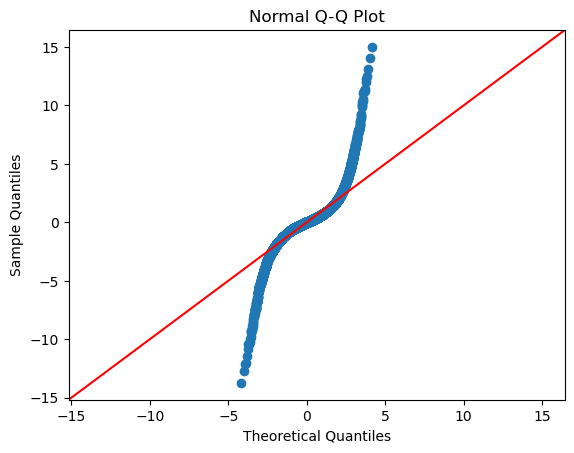

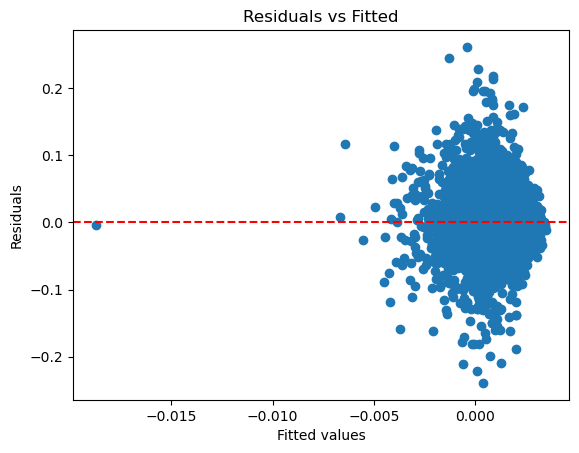

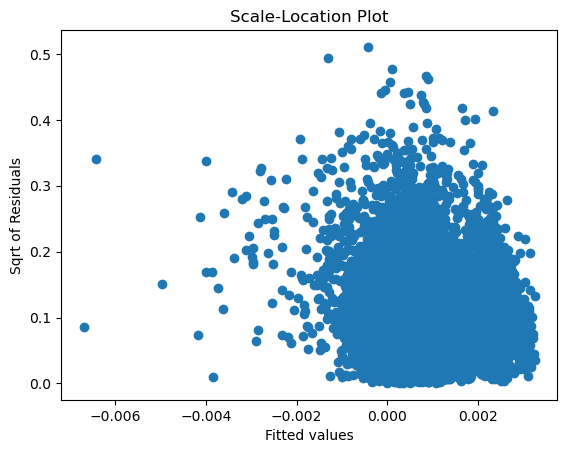

In [84]:
# QQ plot for normality of residuals
fig = sm.qqplot(model_5.resid, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.show()

# Residuals vs Fitted for homoscedasticity
plt.scatter(model_5.fittedvalues, model_5.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Scale-Location plot (also called Spread-Location plot)
plt.scatter(model_5.fittedvalues, model_5.resid**0.5)
plt.xlabel('Fitted values')
plt.ylabel('Sqrt of Residuals')
plt.title('Scale-Location Plot')
plt.show()

# Leverage plot to find influential cases
#sm.graphics.influence_plot(model_1, criterion="cooks")
#plt.title('Influence Plot')
#plt.show()

In [85]:
model_6 = ols('Q("log_return") ~  log_name_price_attention + C(stock_dummy) + volume + daily_spread + mkt_cap + jan_dummy + monday_dummy + annual_rep_release', data=df_scaled).fit() 

model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q("log_return")   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.190
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           1.07e-09
Time:                        17:50:09   Log-Likelihood:             1.8543e+05
No. Observations:               70448   AIC:                        -3.708e+05
Df Residuals:                   70413   BIC:                        -3.705e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.0006      0.001      1.210      0.226      -0.000       0.002
C(stock_dummy)[T.1]         -0.0008      0.001     -1.209      0.227      -0.002       0.000
C(stock_dummy)[T.2]         -0.0007      0.001     -1.173      0.241      -0.002       0.001
C(stock_dummy)[T.3]         -0.0007      0.001     -1.032      0.302      -0.002       0.001
C(stock_dummy)[T.4]         -0.0007      0.001     -1.141      0.254      -0.002       0.001
C(stock_dummy)[T.5]         -0.0004      0.001     -0.656      0.512      -0.002       0.001
C(stock_dummy)[T.6]         -0.0004      0.001     -0.590      0.555      -0.002       0.001
C(stock_dummy)[T.7]         -0.0012      0.001     -1.917      0.055      -0.002    2.65e-05
C(stock_dummy)[T.8]         -0.0011      0.001     -1.812      0.070      -0.002    9.11e-05
C(stock_dummy)[T.9]         -0.0006      0.001     -0.937      0.349      -0.002       0.001
C(stock_dummy)[T.10]        -0.0009      0.001     -1.452      0.146      -0.002       0.000
C(stock_dummy)[T.11]        -0.0009      0.001     -1.373      0.170      -0.002       0.000
C(stock_dummy)[T.12]        -0.0016      0.001     -2.426      0.015      -0.003      -0.000
C(stock_dummy)[T.13]        -0.0002      0.001     -0.368      0.713      -0.001       0.001
C(stock_dummy)[T.14]        -0.0009      0.001     -1.563      0.118      -0.002       0.000
C(stock_dummy)[T.15]        -0.0005      0.001     -0.818      0.413      -0.002       0.001
C(stock_dummy)[T.16]        -0.0005      0.001     -0.906      0.365      -0.002       0.001
C(stock_dummy)[T.17]        -0.0008      0.001     -1.212      0.226      -0.002       0.000
C(stock_dummy)[T.18]        -0.0013      0.001     -2.028      0.043      -0.003   -4.36e-05
C(stock_dummy)[T.19]        -0.0008      0.001     -1.253      0.210      -0.002       0.000
C(stock_dummy)[T.20]        -0.0006      0.001     -1.128      0.259      -0.002       0.000
C(stock_dummy)[T.21]        -0.0005      0.001     -0.833      0.405      -0.002       0.001
C(stock_dummy)[T.22]        -0.0008      0.001     -1.404      0.160      -0.002       0.000
C(stock_dummy)[T.23]        -0.0006      0.001     -0.964      0.335      -0.002       0.001
C(stock_dummy)[T.24]         0.0016      0.001      2.418      0.016       0.000       0.003
C(stock_dummy)[T.25]     -2.604e-05      0.001     -0.042      0.967      -0.001       0.001
C(stock_dummy)[T.26]        -0.0011      0.001     -1.847      0.065      -0.002    6.91e-05
C(stock_dummy)[T.27]        -0.0012      0.001     -2.040      0.041      -0.002   -4.86e-05
log_name_price_attention     0.0003   6.09e-05      4.198      0.000       0.000       0.000
volume                      -0.0007    9.4e-05     -7.609      0.000      -0.001      -0.001
daily_spread  

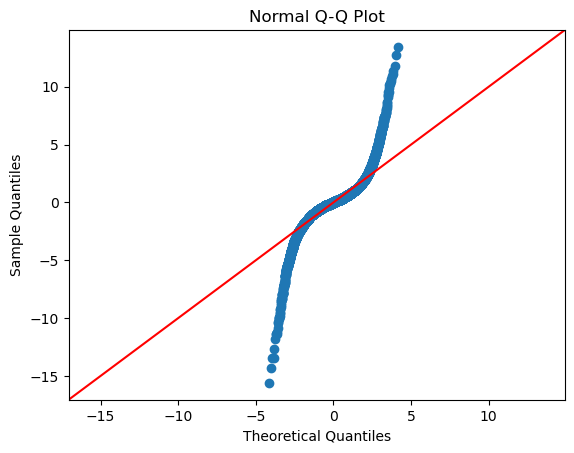

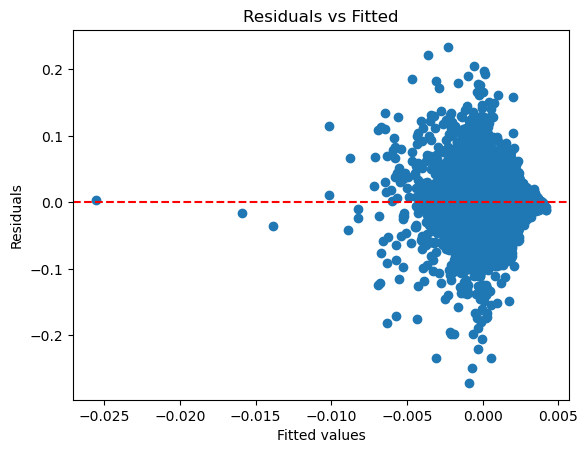

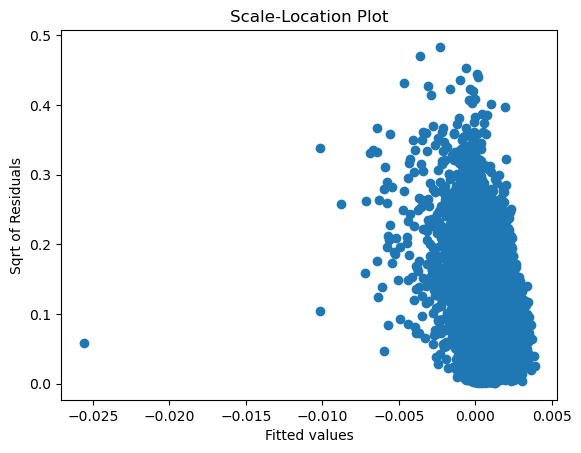

In [86]:
# QQ plot for normality of residuals
fig = sm.qqplot(model_6.resid, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.show()

# Residuals vs Fitted for homoscedasticity
plt.scatter(model_6.fittedvalues, model_6.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Scale-Location plot (also called Spread-Location plot)
plt.scatter(model_6.fittedvalues, model_6.resid**0.5)
plt.xlabel('Fitted values')
plt.ylabel('Sqrt of Residuals')
plt.title('Scale-Location Plot')
plt.show()

# Leverage plot to find influential cases
#sm.graphics.influence_plot(model_1, criterion="cooks")
#plt.title('Influence Plot')
#plt.show()

In [130]:
model_7 = ols('Q("log_return") ~  name_price_attention + C(stock_dummy) + volume + daily_spread + mkt_cap + jan_dummy + monday_dummy + annual_rep_release', data=df_scaled).fit() 
robust_model_7 = model_7.get_robustcov_results()
robust_model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q("log_return")   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.677
Date:                Thu, 07 Mar 2024   Prob (F-statistic):            0.00802
Time:                        18:36:39   Log-Likelihood:             1.8544e+05
No. Observations:               70448   AIC:                        -3.708e+05
Df Residuals:                   70413   BIC:                        -3.705e+05
Df Model:                          34                                         
Covariance Type:                  HC1                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0015      0.001      2.452      0.014       0.000       0.003
C(stock_dummy)[T.1]     -0.0012      0.001     -1.621      0.105      -0.003       0.000
C(stock_dummy)[T.2]     -0.0012      0.001     -1.552      0.121      -0.003       0.000
C(stock_dummy)[T.3]     -0.0009      0.001     -1.077      0.281      -0.003       0.001
C(stock_dummy)[T.4]     -0.0011      0.001     -1.482      0.138      -0.003       0.000
C(stock_dummy)[T.5]     -0.0008      0.001     -0.997      0.319      -0.002       0.001
C(stock_dummy)[T.6]     -0.0006      0.001     -1.031      0.303      -0.002       0.001
C(stock_dummy)[T.7]     -0.0015      0.001     -2.069      0.039      -0.003   -7.69e-05
C(stock_dummy)[T.8]     -0.0013      0.001     -1.880      0.060      -0.003    5.54e-05
C(stock_dummy)[T.9]     -0.0010      0.001     -1.286      0.198      -0.003       0.001
C(stock_dummy)[T.10]    -0.0013      0.001     -1.754      0.079      -0.003       0.000
C(stock_dummy)[T.11]    -0.0012      0.001     -1.747      0.081      -0.003       0.000
C(stock_dummy)[T.12]    -0.0021      0.001     -2.767      0.006      -0.004      -0.001
C(stock_dummy)[T.13]    -0.0006      0.001     -0.874      0.382      -0.002       0.001
C(stock_dummy)[T.14]    -0.0013      0.001     -2.075      0.038      -0.003   -7.27e-05
C(stock_dummy)[T.15]    -0.0008      0.001     -1.318      0.188      -0.002       0.000
C(stock_dummy)[T.16]    -0.0009      0.001     -1.574      0.116      -0.002       0.000
C(stock_dummy)[T.17]    -0.0011      0.001     -1.571      0.116      -0.002       0.000
C(stock_dummy)[T.18]    -0.0016      0.001     -2.176      0.030      -0.003      -0.000
C(stock_dummy)[T.19]    -0.0010      0.001     -1.566      0.117      -0.002       0.000
C(stock_dummy)[T.20]    -0.0007      0.001     -1.227      0.220      -0.002       0.000
C(stock_dummy)[T.21]    -0.0008      0.001     -1.128      0.259      -0.002       0.001
C(stock_dummy)[T.22]    -0.0013      0.001     -2.014      0.044      -0.003   -3.41e-05
C(stock_dummy)[T.23]    -0.0011      0.001     -1.537      0.124      -0.003       0.000
C(stock_dummy)[T.24]     0.0013      0.001      1.292      0.196      -0.001       0.003
C(stock_dummy)[T.25]    -0.0005      0.001     -0.629      0.529      -0.002       0.001
C(stock_dummy)[T.26]    -0.0015      0.001     -2.365      0.018      -0.003      -0.000
C(stock_dummy)[T.27]    -0.0015      0.001     -2.245      0.025      -0.003      -0.000
name_price_attention     0.0004      0.000      2.691      0.007       0.000       0.001
volume                  -0.0008      0.000     -3.452      0.001      -0.001      -0.000
daily_spread            -0.0004      0.000     -1.207      0.227      -0.001       0.000
mkt_cap                  0.0004      0.000      2.569    

In [131]:
model_8 = ols('Q("return") ~  log_name_price_attention + C(stock_dummy) + volume + daily_spread + mkt_cap + jan_dummy + monday_dummy + annual_rep_release', data=df_scaled).fit() 
robust_model_8 = model_8.get_robustcov_results()
robust_model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q("return")   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.025
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           0.000375
Time:                        18:36:40   Log-Likelihood:             1.8546e+05
No. Observations:               70448   AIC:                        -3.708e+05
Df Residuals:                   70413   BIC:                        -3.705e+05
Df Model:                          34                                         
Covariance Type:                  HC1                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.0006      0.001      0.940      0.347      -0.001       0.002
C(stock_dummy)[T.1]         -0.0007      0.001     -0.897      0.370      -0.002       0.001
C(stock_dummy)[T.2]         -0.0005      0.001     -0.676      0.499      -0.002       0.001
C(stock_dummy)[T.3]         -0.0005      0.001     -0.556      0.579      -0.002       0.001
C(stock_dummy)[T.4]         -0.0006      0.001     -0.792      0.428      -0.002       0.001
C(stock_dummy)[T.5]         -0.0002      0.001     -0.243      0.808      -0.002       0.001
C(stock_dummy)[T.6]         -0.0004      0.001     -0.581      0.561      -0.002       0.001
C(stock_dummy)[T.7]         -0.0010      0.001     -1.427      0.154      -0.002       0.000
C(stock_dummy)[T.8]         -0.0010      0.001     -1.402      0.161      -0.002       0.000
C(stock_dummy)[T.9]         -0.0005      0.001     -0.623      0.534      -0.002       0.001
C(stock_dummy)[T.10]        -0.0008      0.001     -1.149      0.251      -0.002       0.001
C(stock_dummy)[T.11]        -0.0007      0.001     -1.029      0.303      -0.002       0.001
C(stock_dummy)[T.12]        -0.0015      0.001     -2.078      0.038      -0.003   -8.31e-05
C(stock_dummy)[T.13]        -0.0002      0.001     -0.346      0.729      -0.002       0.001
C(stock_dummy)[T.14]        -0.0007      0.001     -1.161      0.246      -0.002       0.001
C(stock_dummy)[T.15]        -0.0003      0.001     -0.483      0.629      -0.002       0.001
C(stock_dummy)[T.16]        -0.0004      0.001     -0.718      0.473      -0.002       0.001
C(stock_dummy)[T.17]        -0.0007      0.001     -0.946      0.344      -0.002       0.001
C(stock_dummy)[T.18]        -0.0012      0.001     -1.618      0.106      -0.003       0.000
C(stock_dummy)[T.19]        -0.0007      0.001     -1.012      0.311      -0.002       0.001
C(stock_dummy)[T.20]        -0.0004      0.001     -0.685      0.493      -0.001       0.001
C(stock_dummy)[T.21]        -0.0003      0.001     -0.432      0.666      -0.002       0.001
C(stock_dummy)[T.22]        -0.0007      0.001     -1.081      0.280      -0.002       0.001
C(stock_dummy)[T.23]        -0.0004      0.001     -0.594      0.552      -0.002       0.001
C(stock_dummy)[T.24]         0.0014      0.001      1.311      0.190      -0.001       0.003
C(stock_dummy)[T.25]         0.0001      0.001      0.175      0.861      -0.001       0.002
C(stock_dummy)[T.26]        -0.0011      0.001     -1.907      0.056      -0.002     3.1e-05
C(stock_dummy)[T.27]        -0.0011      0.001     -1.678      0.093      -0.002       0.000
log_name_price_attention     0.0003   6.73e-05      4.321      0.000       0.000       0.000
volume                      -0.0005      0.000     -2.290      0.022      -0.001   -7.57e-05
daily_spread  

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = anomalies_df[['name_price_attention', 'stock_dummy' ,  'mkt_cap' , 'volume' , 'jan_dummy' , 'monday_dummy',  'annual_rep_release']]

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

# Create a column in the dataframe that will contain the names of all the feature variables
vif["Features"] = X.columns

# Create a column in the dataframe that will contain the VIF values of the feature variables
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the dataframe
print(vif)


               Features       VIF
0  name_price_attention  1.143785
1           stock_dummy  1.229486
2               mkt_cap  1.449453
3                volume  1.530853
4             jan_dummy  1.064675
5          monday_dummy  1.159603
6    annual_rep_release  1.008621


In [132]:
model_9 = ols('Q("log_return") ~  log_name_price_attention + C(stock_dummy) + volume + daily_spread + mkt_cap + jan_dummy + monday_dummy + annual_rep_release', data=df_scaled).fit() 
robust_model_9 = model_9.get_robustcov_results()
robust_model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q("log_return")   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.896
Date:                Thu, 07 Mar 2024   Prob (F-statistic):            0.00124
Time:                        18:36:40   Log-Likelihood:             1.8543e+05
No. Observations:               70448   AIC:                        -3.708e+05
Df Residuals:                   70413   BIC:                        -3.705e+05
Df Model:                          34                                         
Covariance Type:                  HC1                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.0006      0.001      1.007      0.314      -0.001       0.002
C(stock_dummy)[T.1]         -0.0008      0.001     -1.040      0.298      -0.002       0.001
C(stock_dummy)[T.2]         -0.0007      0.001     -0.991      0.322      -0.002       0.001
C(stock_dummy)[T.3]         -0.0007      0.001     -0.781      0.435      -0.002       0.001
C(stock_dummy)[T.4]         -0.0007      0.001     -0.975      0.330      -0.002       0.001
C(stock_dummy)[T.5]         -0.0004      0.001     -0.525      0.599      -0.002       0.001
C(stock_dummy)[T.6]         -0.0004      0.001     -0.587      0.557      -0.002       0.001
C(stock_dummy)[T.7]         -0.0012      0.001     -1.673      0.094      -0.003       0.000
C(stock_dummy)[T.8]         -0.0011      0.001     -1.604      0.109      -0.002       0.000
C(stock_dummy)[T.9]         -0.0006      0.001     -0.769      0.442      -0.002       0.001
C(stock_dummy)[T.10]        -0.0009      0.001     -1.274      0.203      -0.002       0.000
C(stock_dummy)[T.11]        -0.0009      0.001     -1.226      0.220      -0.002       0.001
C(stock_dummy)[T.12]        -0.0016      0.001     -2.203      0.028      -0.003      -0.000
C(stock_dummy)[T.13]        -0.0002      0.001     -0.341      0.733      -0.002       0.001
C(stock_dummy)[T.14]        -0.0009      0.001     -1.451      0.147      -0.002       0.000
C(stock_dummy)[T.15]        -0.0005      0.001     -0.743      0.458      -0.002       0.001
C(stock_dummy)[T.16]        -0.0005      0.001     -0.913      0.361      -0.002       0.001
C(stock_dummy)[T.17]        -0.0008      0.001     -1.106      0.269      -0.002       0.001
C(stock_dummy)[T.18]        -0.0013      0.001     -1.800      0.072      -0.003       0.000
C(stock_dummy)[T.19]        -0.0008      0.001     -1.194      0.233      -0.002       0.000
C(stock_dummy)[T.20]        -0.0006      0.001     -1.029      0.303      -0.002       0.001
C(stock_dummy)[T.21]        -0.0005      0.001     -0.721      0.471      -0.002       0.001
C(stock_dummy)[T.22]        -0.0008      0.001     -1.330      0.184      -0.002       0.000
C(stock_dummy)[T.23]        -0.0006      0.001     -0.849      0.396      -0.002       0.001
C(stock_dummy)[T.24]         0.0016      0.001      1.502      0.133      -0.000       0.004
C(stock_dummy)[T.25]     -2.604e-05      0.001     -0.034      0.973      -0.002       0.001
C(stock_dummy)[T.26]        -0.0011      0.001     -1.911      0.056      -0.002    2.89e-05
C(stock_dummy)[T.27]        -0.0012      0.001     -1.890      0.059      -0.003    4.56e-05
log_name_price_attention     0.0003   6.72e-05      3.805      0.000       0.000       0.000
volume                      -0.0007      0.000     -3.099      0.002      -0.001      -0.000
daily_spread  

In [133]:
model_10 = ols('Q("return") ~  name_price_attention + C(stock_dummy) + volume + daily_spread + mkt_cap + jan_dummy + monday_dummy + annual_rep_release', data=df_scaled).fit() 
robust_model_10 = model_10.get_robustcov_results()
robust_model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q("return")   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.769
Date:                Thu, 07 Mar 2024   Prob (F-statistic):            0.00374
Time:                        18:36:41   Log-Likelihood:             1.8547e+05
No. Observations:               70448   AIC:                        -3.709e+05
Df Residuals:                   70413   BIC:                        -3.705e+05
Df Model:                          34                                         
Covariance Type:                  HC1                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0016      0.001      2.651      0.008       0.000       0.003
C(stock_dummy)[T.1]     -0.0012      0.001     -1.634      0.102      -0.003       0.000
C(stock_dummy)[T.2]     -0.0010      0.001     -1.358      0.175      -0.002       0.000
C(stock_dummy)[T.3]     -0.0008      0.001     -0.928      0.353      -0.002       0.001
C(stock_dummy)[T.4]     -0.0011      0.001     -1.460      0.144      -0.003       0.000
C(stock_dummy)[T.5]     -0.0006      0.001     -0.823      0.411      -0.002       0.001
C(stock_dummy)[T.6]     -0.0007      0.001     -1.171      0.242      -0.002       0.000
C(stock_dummy)[T.7]     -0.0014      0.001     -1.955      0.051      -0.003    3.71e-06
C(stock_dummy)[T.8]     -0.0012      0.001     -1.768      0.077      -0.003       0.000
C(stock_dummy)[T.9]     -0.0010      0.001     -1.251      0.211      -0.002       0.001
C(stock_dummy)[T.10]    -0.0013      0.001     -1.797      0.072      -0.003       0.000
C(stock_dummy)[T.11]    -0.0012      0.001     -1.691      0.091      -0.003       0.000
C(stock_dummy)[T.12]    -0.0022      0.001     -2.890      0.004      -0.004      -0.001
C(stock_dummy)[T.13]    -0.0007      0.001     -1.050      0.294      -0.002       0.001
C(stock_dummy)[T.14]    -0.0012      0.001     -1.907      0.057      -0.002    3.37e-05
C(stock_dummy)[T.15]    -0.0008      0.001     -1.181      0.238      -0.002       0.000
C(stock_dummy)[T.16]    -0.0009      0.001     -1.510      0.131      -0.002       0.000
C(stock_dummy)[T.17]    -0.0011      0.001     -1.541      0.123      -0.002       0.000
C(stock_dummy)[T.18]    -0.0015      0.001     -2.109      0.035      -0.003      -0.000
C(stock_dummy)[T.19]    -0.0010      0.001     -1.499      0.134      -0.002       0.000
C(stock_dummy)[T.20]    -0.0005      0.001     -0.929      0.353      -0.002       0.001
C(stock_dummy)[T.21]    -0.0007      0.001     -0.922      0.357      -0.002       0.001
C(stock_dummy)[T.22]    -0.0012      0.001     -1.918      0.055      -0.002    2.65e-05
C(stock_dummy)[T.23]    -0.0010      0.001     -1.423      0.155      -0.002       0.000
C(stock_dummy)[T.24]     0.0011      0.001      1.054      0.292      -0.001       0.003
C(stock_dummy)[T.25]    -0.0004      0.001     -0.507      0.612      -0.002       0.001
C(stock_dummy)[T.26]    -0.0016      0.001     -2.560      0.010      -0.003      -0.000
C(stock_dummy)[T.27]    -0.0014      0.001     -2.170      0.030      -0.003      -0.000
name_price_attention     0.0005      0.000      3.302      0.001       0.000       0.001
volume                  -0.0006      0.000     -2.725      0.006      -0.001      -0.000
daily_spread            -0.0002      0.000     -0.516      0.606      -0.001       0.000
mkt_cap                  0.0003      0.000      1.656    

In [139]:
# create a table that shows the results of all robust 
from statsmodels.iolib.summary2 import summary_col

# Assuming results1 to results8 are the fitted model results
results_list = [robust_model_7, robust_model_8, robust_model_9,  robust_model_10 ]



# Create the regression table
regression_table = summary_col(results_list,
                               stars=True,
                               model_names=[
                                   'Model 7', 'Model 8', #'Model 3',
                                   'Model 9', #'Model 5', 
                                   'Model 10', #'Model 7', 'Model 8'
                               ],
                               #float_format="%0.0002f",
                               info_dict={'N': lambda x: f"{int(x.nobs)}", 'R2': lambda x: f"{x.rsquared:.2f}"})

regression_table

,Model 7,Model 8,Model 9,Model 10
C(stock_dummy)[T.10],-0.0013*,-0.0008,-0.0009,-0.0013*
,(0.0007),(0.0007),(0.0007),(0.0007)
C(stock_dummy)[T.11],-0.0012*,-0.0007,-0.0009,-0.0012*
,(0.0007),(0.0007),(0.0007),(0.0007)
C(stock_dummy)[T.12],-0.0021***,-0.0015**,-0.0016**,-0.0022***
,(0.0008),(0.0007),(0.0007),(0.0008)
C(stock_dummy)[T.13],-0.0006,-0.0002,-0.0002,-0.0007
,(0.0007),(0.0007),(0.0007),(0.0007)
C(stock_dummy)[T.14],-0.0013**,-0.0007,-0.0009,-0.0012*
,(0.0006),(0.0006),(0.0006),(0.0006)


In [143]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define the formula
formula = 'Q("log_return") ~ C(stock_dummy) + name_price_attention + C(stock_dummy) + volume + daily_spread + mkt_cap + jan_dummy + monday_dummy + annual_rep_release'

# Fit the model using RLM for a robust regression
model_rlm1 = smf.rlm(formula, data=df_scaled, M=sm.robust.norms.HuberT())
results_rlm1 = model_rlm1.fit()

# Print the summary
results_rlm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:        Q("log_return")   No. Observations:                70448
Model:                            RLM   Df Residuals:                    70413
Method:                          IRLS   Df Model:                           34
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 07 Mar 2024                                         
Time:                        18:53:44                                         
No. Iterations:                    50                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0017      0.000      4.802      0.000       0.001       0.002
C(stock_dummy)[T.1]     -0.0017      0.000     -3.593      0.000      -0.003      -0.001
C(stock_dummy)[T.2]     -0.0013      0.000     -2.886      0.004      -0.002      -0.000
C(stock_dummy)[T.3]     -0.0010      0.000     -2.194      0.028      -0.002      -0.000
C(stock_dummy)[T.4]     -0.0015      0.000     -3.157      0.002      -0.002      -0.001
C(stock_dummy)[T.5]     -0.0007      0.000     -1.539      0.124      -0.002       0.000
C(stock_dummy)[T.6]     -0.0010      0.000     -2.324      0.020      -0.002      -0.000
C(stock_dummy)[T.7]     -0.0018      0.000     -4.068      0.000      -0.003      -0.001
C(stock_dummy)[T.8]     -0.0017      0.000     -3.769      0.000      -0.003      -0.001
C(stock_dummy)[T.9]     -0.0010      0.000     -2.206      0.027      -0.002      -0.000
C(stock_dummy)[T.10]    -0.0014      0.000     -3.105      0.002      -0.002      -0.001
C(stock_dummy)[T.11]    -0.0015      0.000     -3.217      0.001      -0.002      -0.001
C(stock_dummy)[T.12]    -0.0026      0.000     -5.463      0.000      -0.004      -0.002
C(stock_dummy)[T.13]    -0.0011      0.000     -2.383      0.017      -0.002      -0.000
C(stock_dummy)[T.14]    -0.0015      0.000     -3.516      0.000      -0.002      -0.001
C(stock_dummy)[T.15]    -0.0012      0.000     -2.695      0.007      -0.002      -0.000
C(stock_dummy)[T.16]    -0.0012      0.000     -2.688      0.007      -0.002      -0.000
C(stock_dummy)[T.17]    -0.0015      0.000     -3.253      0.001      -0.002      -0.001
C(stock_dummy)[T.18]    -0.0017      0.000     -3.584      0.000      -0.003      -0.001
C(stock_dummy)[T.19]    -0.0015      0.000     -3.295      0.001      -0.002      -0.001
C(stock_dummy)[T.20]    -0.0008      0.000     -2.093      0.036      -0.001   -4.87e-05
C(stock_dummy)[T.21]    -0.0011      0.000     -2.467      0.014      -0.002      -0.000
C(stock_dummy)[T.22]    -0.0016      0.000     -3.626      0.000      -0.002      -0.001
C(stock_dummy)[T.23]    -0.0012      0.000     -2.609      0.009      -0.002      -0.000
C(stock_dummy)[T.24]     0.0015      0.000      3.190      0.001       0.001       0.002
C(stock_dummy)[T.25]    -0.0006      0.000     -1.334      0.182      -0.001       0.000
C(stock_dummy)[T.26]    -0.0022      0.000     -4.879      0.000      -0.003      -0.001
C(stock_dummy)[T.27]    -0.0019      0.000     -4.345      0.000      -0.003      -0.001
name_price_attention     0.0007   6.16e-05     10.750      0.000       0.001       0.001
volume                  -0.0009   6.94e-05    -12.565      0.000      -0.001      -0.001
daily_spread            -0.0009   5.96e-05    -15.024      0.000      -0.001      -0.001
mkt_cap                  0.0003   8.32e-05      3.913    

In [144]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Calculate the log-likelihood using the Pearson residuals as a proxy
pearson_resid = results_rlm1.resid_pearson
deviance = np.sum(pearson_resid**2)
log_likelihood = -0.5 * deviance

# Get the number of parameters (k) including the intercept
# It is results.params.size or you can use the df_model which returns the degrees of freedom of the model
num_params = results_rlm1.df_model + 1  # Plus one for the intercept

# Get the number of observations (n)
num_obs = results_rlm1.nobs

# Calculate AIC and BIC using the traditional formulas
AIC = -2 * log_likelihood + 2 * num_params
BIC = -2 * log_likelihood + np.log(num_obs) * num_params

# Print the results
print(f'Log-likelihood: {log_likelihood:.4f}')
print(f'AIC: {AIC:.4f}')
print(f'BIC: {BIC:.4f}')


AttributeError: 'RLMResults' object has no attribute 'resid_pearson'

## Robustness Test 



## Non-linear model 
**Gradient Boosting Regressor**
Based on the results of our best fiting model, namely model ..., we can conclude that there is a statistically significant effect of the attention of retail investors in stock returns. The effect however seems to be very low. In order to see the hierarchical feature importance we now perform a gradient boosting regressor.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

In [ ]:
#splitting the data

fix_seed = 32
#X = df['name_price_attention']  # Extracting the feature
X = df_scaled[['name_price_attention', 'mkt_cap', 'volume']] #subject to change based on Robust regression
y = df_scaled['log_return']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=fix_seed)

In [ ]:
#params = {
    #"n_estimators": 100,
    #"max_depth": 10,
    #"min_samples_split": 5,
    #"learning_rate": 0.1,
    #"loss": "squared_error",} #run a grid search maybe?

gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=fix_seed)
gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor(random_state=32)

In [ ]:

y_pred = gb_regressor.predict(X_test)

# Evaluate the model
mse1 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse1)

Mean Squared Error: 0.9821766084220978


In [ ]:
feature_importances = gb_regressor.feature_importances_

# Get column names of your features
feature_names = X_train.columns

# Create a dictionary to map feature names to their importances
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the dictionary by importance values (optional)
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or access the feature importances
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: volume, Importance: 0.3601224941313657
Feature: mkt_cap, Importance: 0.35593993059555534
Feature: log_name_price_attention, Importance: 0.2839375752730789


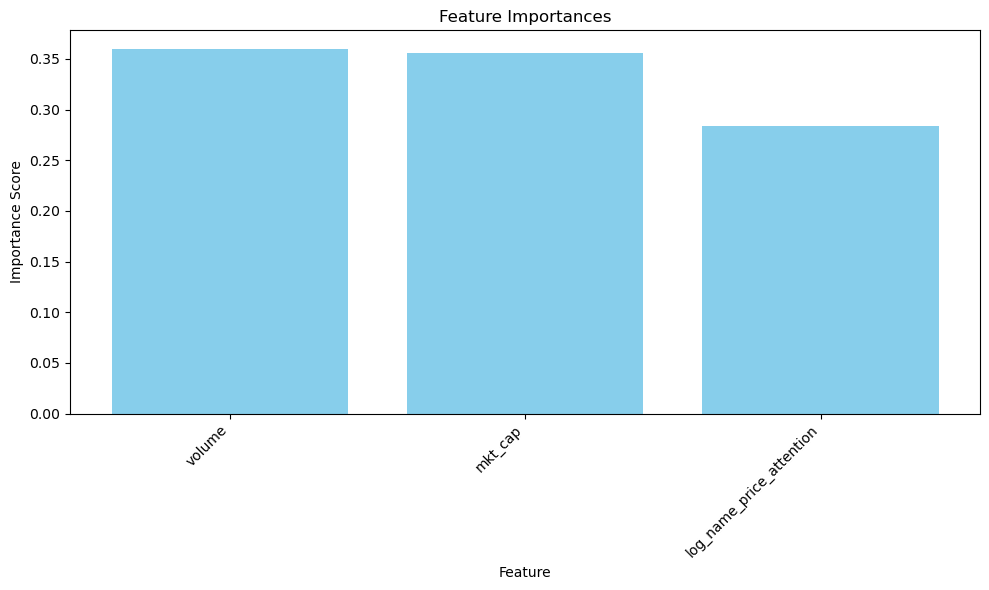

In [ ]:
sorted_features = [x[0] for x in sorted_feature_importance]
sorted_importances = [x[1] for x in sorted_feature_importance]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_features)), sorted_importances, color="skyblue", align="center")
plt.xticks(range(len(sorted_features)), sorted_features, rotation=45, ha='right')
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()